<a href="https://colab.research.google.com/github/AlannaGonzaga/Mini_project_Churn/blob/main/Teste_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise Churn - Setor Bancário
<center><img alt="Analise Churn"  src="https://cdn.corporatefinanceinstitute.com/assets/churn-rate-1024x683.jpeg"></center>

O dataset contém dados de clientes que tem proabilidade de deixar um banco. O arquivo em formato csv foi disponibilizado com objetivo de fazer uma análise mais assertiva para descobrir as possíveis causas dos clientes estarem deixando de continuar com os serviços bancários.

O objetivo desse projeto é montar um modelo preditivo com análises exploratória do perfil dos clientes para prevêr se o cliente vai manter a conta no banco ou tem probabilidade de cancelar.



## Obtenção dos Dados

Todos os dados utilizados aqui foram obtidos a partir de um arquivo disponibilizado em csv.

Abaixo as bibliotecas que serão utilizadas.

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt  
import seaborn as sns
import statistics  as sts


sns.set()

%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

### Busca e visualização das cinco primeiras linhas do dataset.

In [ ]:
dados = pd.read_csv('bank_customers.csv')

In [ ]:
dados.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Resumo geral do Dataset

In [ ]:
print('Este dataset contém:')
print('{:,} entradas'.format(dados.shape[0]).replace(',','.'))
print('{} Variáveis'.format(dados.shape[1]))

Este dataset contém:
10.000 entradas
14 Variáveis


In [ ]:
#Total de Clientes ativos
dados.IsActiveMember.sum()


5151

In [ ]:
#Total de clientes inativos
dados.Exited.sum()

2037

In [ ]:
#Classificação de gênero
dados.groupby(['Gender']).size()

Gender
Female    4543
Male      5457
dtype: int64

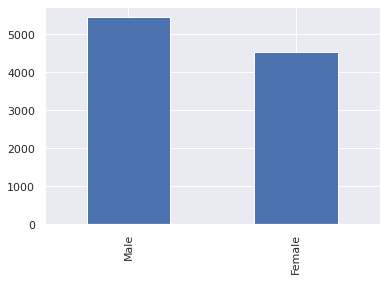

In [ ]:
dados.Gender.value_counts().plot(kind='bar')

Foi feita uma cópia da base de dados somente com os clientes inativos

In [ ]:
df= dados.copy()
dados_churn = df[df["Exited"] == 1]

In [ ]:
# saídas por genero
dados_churn.groupby("Gender").agg({"Exited": "count"})

,Exited
Gender,
Female,1139
Male,898


In [ ]:
# saídas por localidade
dados_churn.groupby("Geography").agg({"Exited": "count"})

,Exited
Geography,
France,810
Germany,814
Spain,413


In [ ]:
# saídas dos clientes que possuíam cartões de crédito
dados_churn.groupby("HasCrCard").agg({"Exited": "count"})

,Exited
HasCrCard,
0,613
1,1424


In [ ]:
# saídas dos clientes com produtos no banco
dados_churn.groupby("NumOfProducts").agg({"Exited": "count"})

,Exited
NumOfProducts,
1,1409
2,348
3,220
4,60


In [ ]:
# saídas dos clientes que mantinham a carteira ativa
dados_churn.groupby("IsActiveMember").agg({"Exited": "count"})

,Exited
IsActiveMember,
0,1302
1,735


### Alguns dados importantes que precisam ser listados:

* a) Os clientes do sexo feminino foram que mais saíram do banco.
* b) A Alemanha foi o país com maior número de saídas.
* c) Os clientes que possuem cartão de crédito têm mais saídas do que nenhum cartão.
* d) Os clientes que têm mais produtos têm menos probabilidade de abandono.
* e) Membros ativos têm menos probabilidade de sair.





In [ ]:
d1= dados.copy()
dados_Active = d1[d1["Exited"] == 0]

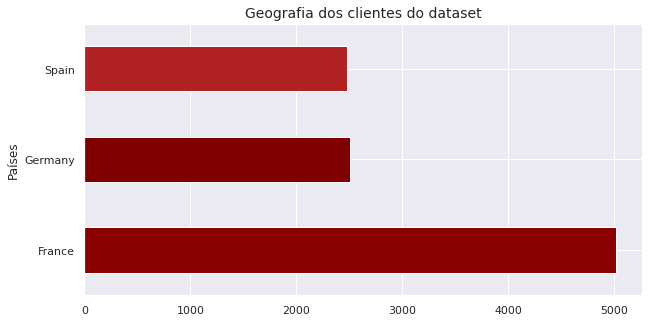

In [ ]:
# Localidade de concentração dos clientes em todo dataset

colors = [ 'darkred','maroon', 'firebrick']
plt.figure(figsize=(10,5))
dados['Geography'].value_counts()[:3].plot(kind='barh', color=colors)
plt.ylabel("Países", size=12) 
plt.title("Geografia dos clientes do dataset", size=14) 
plt.show()

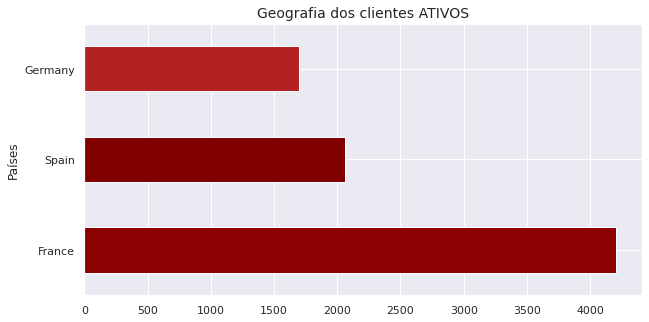

In [ ]:
# Localidade de concentração dos clientes ativos

colors = [ 'darkred','maroon', 'firebrick']
plt.figure(figsize=(10,5))
dados_Active['Geography'].value_counts()[:3].plot(kind='barh', color=colors)
plt.ylabel("Países", size=12) 
plt.title("Geografia dos clientes ATIVOS", size=14) 
plt.show()

Após a análise, a Alemanha ficou em último lugar no ranking de clientes

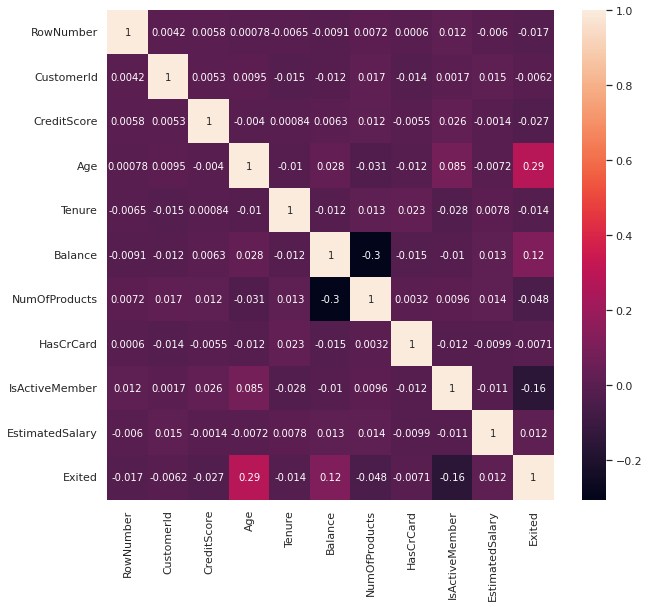

In [ ]:
f, ax = plt.subplots(figsize=(10, 9)) 
sns.heatmap(dados.corr(),annot=True)

Acima inserimos uma matriz de correlação pois facilita a associação entre duas ou mais variáveis, neste caso mostra qual é o grau de dependencia entre variáveis, ou seja, o quanto uma variável interfere em outra.

Qualquer valor inferior a 0,4 é considerado uma fraca ou nenhuma correlação. 
O gráfico acima apresenta que nenhuma das variáveis tem dependencias fortes.


In [ ]:
#vamos verificar se existe algum dado fora do normal na coluna idade 
dados['Age'].describe()

count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: Age, dtype: float64

Text(0.5, 1.0, 'Age')

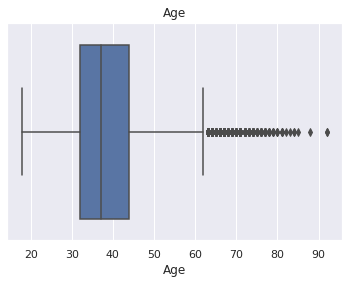

In [ ]:
#verificando o resultado
sns.boxplot(dados['Age']).set_title('Age')

Possível notar a maior concentração do público com idade entre 35 a 45 anos.

In [ ]:
# Cálculo de Churn rate simples

(dados['Exited']==1).sum()/(dados['Exited']==0).sum()

0.25580811252040686

Algumas conclusões:

Em um período não estipulado pela base de dados temos uma churn rate de 25%, que é considerado alto, geralmente os especialistas sugerem que esse número fique entre 5% até 7%, porém isso pode variar de acordo com o setor, quantidade de clientes, geografia, receita anual entre outros.

É importante ressaltar que por conta da pandemia, as empresas tem se esforçado cada vez mais para reter seus clientes, por isso o acompanhamento e entedimento do Churn é extremamente necessário para o sucesso de muitos negócios.

A quantidade de mulheres com maior concentração na Alemanha foram as que mais saíram do banco. Também foi possível notar o quanto é importante manter o contato mais próximo com os clientes para se manterem ativos, pois vimos que a probabilidade de abandono com ausência de oferta de produtos é uma das possíveis causas de saída.

Obrigada pela leitura !

Alanna Gonzaga
https://github.com/AlannaGonzaga